In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import models
from torchvision.utils import make_grid
from torch import nn
import matplotlib.pyplot as plt

def show_conv1(model):
    for m in [module for module in model.modules() if type(module) != nn.Sequential]:
        if isinstance(m, nn.Conv2d):
            break
    kernels = m.weight.detach().clone().cpu()
    kernels = kernels - kernels.min()
    kernels = kernels / kernels.max()
    img = make_grid(kernels, nrow=16)
    ax = plt.imshow(img.permute(1, 2, 0))
    return ax;

In [3]:
# load model
model_name = 'ipcl1'
model, transform = models.__dict__[model_name]()
model

{'ref#': 1, 'type': 'ipcl', 'details': 'primary model', 'aug': 'Set 1', 'top1_knn': 38.4, 'top1_linear': 39.5, 'out_dim': 128, 'l2norm': True, 'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}
=> loading checkpoint: 06_instance_imagenet_AlexNet_n5_lr03_pct40_t07_div1000_e100_bs128_bm20_gn_stack_final_weights_only.pth.tar
=> state loaded.


alexnet_gn(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2), bias=False)
    (1): GroupNorm(32, 96, eps=1e-05, affine=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
    (1): GroupNorm(32, 256, eps=1e-05, affine=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_3): Sequential(
    (0): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): GroupNorm(32, 384, eps=1e-05, affine=True)
    (2): ReLU(inplace=True)
  )
  (conv_block_4): Sequential(
    (0): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): GroupNorm(32, 384, eps=1e-05, affine=True)
    (2): ReLU(inplace=True)
  )
  (conv_blo

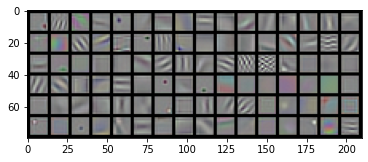

In [4]:
show_conv1(model);

In [5]:
# If you are getting activations for test images, use the supplied transform
# note that different models used different normalization statistics
# transforms used for training and evaulation can be found in the corresponding scripts
transform

Compose(
    Resize(size=224, interpolation=PIL.Image.BILINEAR)
    CenterCrop(size=(224, 224))
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

In [6]:
from PIL import Image
from lib.feature_extractor import FeatureExtractor

# load an image
img = Image.open('./images/cheetah.jpg')

# transform and add batch dimension
img = transform(img).unsqueeze(0)

# get features from fc7
model.eval()
with FeatureExtractor(model, 'fc7') as extractor:
    features = extractor(img)
    for name,val in features.items():
        print(name, val.shape)

fc7 torch.Size([1, 4096])


In [7]:
# get features from fc7, fc8, and l2norm layers
model.eval()
with FeatureExtractor(model, ['fc7','fc8','l2norm']) as extractor:
    features = extractor(img)
    for name,val in features.items():
        print(name, val.shape)

fc7 torch.Size([1, 4096])
fc8 torch.Size([1, 128])
l2norm torch.Size([1, 128])


In [16]:
# get features from conv_block1.0, conv_block1.1, conv_block1.2
model.eval()
with FeatureExtractor(model, ['conv_block_1.0','conv_block_1.1','conv_block_1.2']) as extractor:
    features = extractor(img)
    for name,val in features.items():
        print(name, val.shape) 

conv_block_1.0 torch.Size([1, 96, 55, 55])
conv_block_1.1 torch.Size([1, 96, 55, 55])
conv_block_1.2 torch.Size([1, 96, 55, 55])
